# Optimal Growth Model with Value Function Iteration using Julia

In [1]:
# working like np.argmax(matrix,axis=1)
function argmax(mat)
    values, indices = findmax(mat,2)
    return ind2sub(size(mat),vec(indices))[2]
end

argmax (generic function with 1 method)

In [2]:
function VFI()
    # primitive parameter
    beta = 0.95 #subjective discount factor
    sigma = 2.0 # relative riskb aversion
    delta = 0.1 #depriciation rate
    alpha = 0.33 # capital share

    # Steady state
    aterm = 1.0/beta -(1.0 -delta)
    kstar = alpha/aterm
    kstar = kstar^(1.0/(1.0-alpha))

    # discretize asset space
    amin = 0.1*kstar
    amax = 2*kstar
    na   = 250
    agrid = linspace(amin,amax,na)
   
    #initialize value function and so on
    v  = zeros(na,na) # temp value function
    c  = zeros(na,na) # consuption matrix
    util = zeros(na,na) # utility matrix
    v0 = zeros(na,1) # initial guess of value function
    Tv = zeros(na,1) # update value function
    pol_a =zeros(na,1) # policy function
    
    
    #create consuption and utility matrix        
    for i in 1:na # for control variable a_{t+1}
        for j in 1:na # for state variable a_t
            c[j,i] = agrid[j]^alpha +(1-delta)*agrid[j]-agrid[i]
            util[j,i] =(c[j,i]^(1-sigma))/(1-sigma)
            if c[j,i] <= 0
                util[j,i] = -999999999.9 # penalty
            end
        end
    end
    
    #iteration settings
    iteration = 0
    tol =0.00001
    error = 10.0

    # value function iteration
    while error > tol
        # calculate temp value function
        for i in 1:na
            for j in 1:na
                v[j,i] = util[j,i] + beta*v0[i]
            end
        end
        
        a_index = argmax(v) # obtain policy function ver. index
        Tv = maximum(v,2) # obtain new value funtion
        for i in 1:na
            pol_a[i]   = agrid[a_index[i]]
        end
        error = maximum(abs.(Tv-v0)) # update error
        v0    = Tv # update value function
        iteration += 1
    
    end
    #println("converged!")
    #println(iteration)
    return(agrid,v0,pol_a)
end

VFI (generic function with 1 method)

In [3]:
using BenchmarkTools

In [4]:
@benchmark VFI()

BenchmarkTools.Trial: 
  memory estimate:  4.80 MiB
  allocs estimate:  5860
  --------------
  minimum time:     56.145 ms (0.00% GC)
  median time:      57.858 ms (0.00% GC)
  mean time:        58.394 ms (1.36% GC)
  maximum time:     65.252 ms (5.92% GC)
  --------------
  samples:          86
  evals/sample:     1

In [5]:
agrid,v0,pol_a = VFI()

(0.31608601990722374:0.02411901356721787:6.321720398144474, [-22.9349; -22.7696; … ; -15.6818; -15.6718], [0.484919; 0.509038; … ; 5.95994; 5.95994])

In [6]:
using Plots


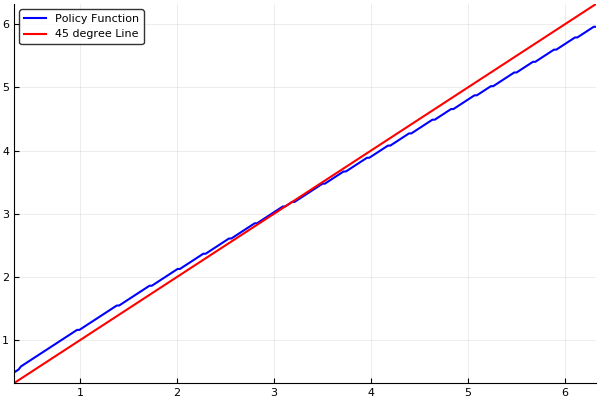

In [7]:
plot(agrid,pol_a ,color="blue", linewidth=1.5, label="Policy Function")
plot!(agrid,agrid, color="red", linewidth=1.5, label="45 degree Line")


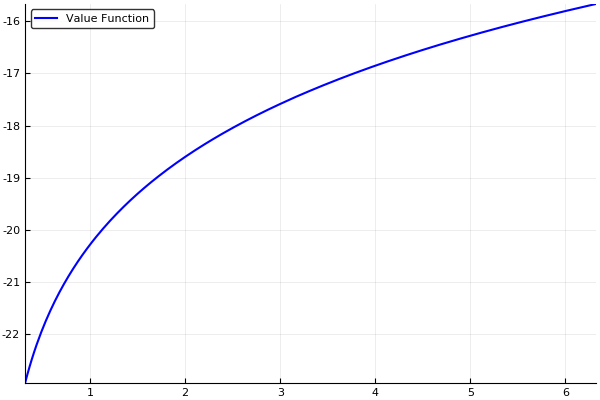

In [8]:
plot(agrid,v0,color="blue",linewidth=1.5, label="Value Function")